# Part I - Ford GoBike Data Exploration
## by Timothy Lee Quan

## Introduction
This Jupyter notebook is an exploration of the "Ford GoBike" data set.
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District.[3] Bay Wheels is 'the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company.
[Bay Wheels (Ford GoBike)](https://en.wikipedia.org/wiki/Bay_Wheels)

## Preliminary Wrangling



In [38]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

In [39]:
bike_rides = pd.read_csv('201902-fordgobike-tripdata.csv')
bike_rides.info()
bike_rides.describe()
bike_rides.start_station_id.value_counts()
print(f'First ride: {bike_rides.start_time.min()}, last ride: {bike_rides.start_time.max()}')
bike_rides.sample(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
48590,734,2019-02-22 07:30:35.4820,2019-02-22 07:42:49.9420,75.0,Market St at Franklin St,37.773793,-122.421239,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,3704,Subscriber,1989.0,Male,No
28711,542,2019-02-25 08:25:51.8240,2019-02-25 08:34:54.0320,267.0,Derby St at College Ave,37.861804,-122.253569,246.0,Berkeley Civic Center,37.869060,-122.270556,2435,Subscriber,1966.0,Male,No
104720,138,2019-02-14 08:18:52.8430,2019-02-14 08:21:11.0000,176.0,MacArthur BART Station,37.828410,-122.266315,212.0,Mosswood Park,37.824893,-122.260437,5116,Subscriber,1969.0,Male,No
108658,448,2019-02-13 06:55:39.0790,2019-02-13 07:03:07.8120,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,1973,Subscriber,NaN,NaN,No
92088,521,2019-02-15 20:05:06.2010,2019-02-15 20:13:47.5590,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,58.0,Market St at 10th St,37.776619,-122.417385,6208,Subscriber,1989.0,Male,No


### What is the structure of your dataset?

This dataset contains 183,413 records of rides/uses of the Ford GoBike System. 

It covers time related data in these columns:
`duration_sec, start_time, end_time`

Location data:
`start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude`

Bike identification:
`bike_id`

And user information:
`user_type, member_birth_year, member_gender`


### What is/are the main feature(s) of interest in your dataset?

* Peak times - are there any identifiable trends in the start/end times?
* Membership status - do the users tend to be subscribers, or one off customers? Are there any relationships to be seen between the membertype and peak times, or start/end stations?
* Bike_ID - Are there any bikes that have happen to have been used more? Could this be used for a planned maintenance schedule, or could the milage infer anything else? 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

* Peak times - supported by time data: `duration_sec, start_time, end_time`
* Membership status - supported by user information: `user_type, member_birth_year, member_gender`
* Bike ID: `bike_id`





## Univariate Exploration

### Univariate Exploration: Time data

Are there times of day or days of the week that people tend to ride more often?
How long do these rides usually last?

In [40]:
def stamp_to_seconds(stamp, reverse = False):
    if not reverse:
        val = (stamp.time().hour * 3600 +
            stamp.time().minute * 60 + 
            stamp.time().second)        
    else:
        val = datetime.timedelta(seconds=stamp)
    return (val)


#need to set appropriate datatypes to 'start_time', 'end_time'
bike_rides.start_time = pd.to_datetime(bike_rides.start_time)
bike_rides.end_time = pd.to_datetime(bike_rides.end_time)

#these columns are the start time of day in seconds
bike_rides['start_tod_sec'] = bike_rides.start_time.apply(stamp_to_seconds)
bike_rides['end_tod_sec'] = bike_rides.end_time.apply(stamp_to_seconds)

#creating a start hour column
bike_rides['start_hour'] = bike_rides.start_time.dt.hour

#creating a categorical day of week column
bike_rides['day_of_week'] = pd.Categorical.from_codes(bike_rides.start_time.dt.day_of_week,
    categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

>**Notes**: The start/end time distribution histograms show that the peaks times are roughly the same, which can be explained by most ride duration centering at around 6 minutes rather than representing something like we might expect from a round trip commute. People ride much more during the week further indicating use by commuters. The ride duration was best expressed with a log transformation.

### Univariate Exploration: User data

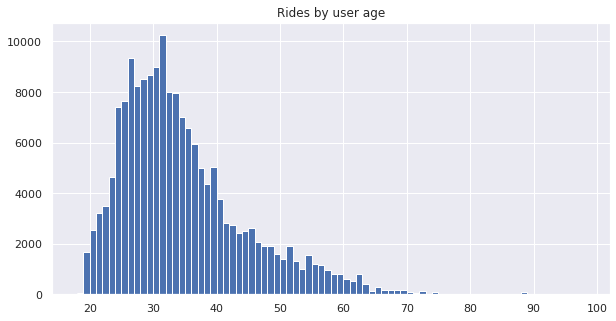

In [41]:
#there are some rows with no user data at all, and some seem to have bogus years of birth based on the assumption that 142 year olds aren't renting bicycles.
#we will visualize from a pruned user data subset.

bike_rides.drop(bike_rides[bike_rides['member_birth_year'] < 1918].index, inplace = True)
bike_rides['member_age_rough'] = 2019 - bike_rides.member_birth_year

bins = np.arange(bike_rides.member_age_rough.min(),
    bike_rides.member_age_rough.max(),
    1)

plt.figure(figsize=(10,5))
plt.hist(bike_rides.member_age_rough,
    bins=bins)
plt.title('Rides by user age')
plt.show();


>**Notes**: A temporary dataframe called 'member_rides' was created, dropping records of members with a birth year prior to 1918, and creating a new column "member_age_rough". 
The riders mean age appears to be around 34, and the number of riders sharply drops off from there. There aren't user IDs in the dataset or any way to distinguish individual users out multiple rows, so, any further analysis of user data would have to be bi/multivariate.


### Univariate Exploration: Bikes Data


In [42]:
#create bike stats df bike_data
bike_data = pd.DataFrame()
bike_data['total_usage_time'] = bike_rides.copy().groupby('bike_id').sum()['duration_sec']
bike_data['ride_count'] = bike_rides.bike_id.value_counts()
bike_data['average_ride_duration'] = bike_rides.copy().groupby('bike_id').mean()['duration_sec']
bike_data.describe()

,total_usage_time,ride_count,average_ride_duration
count,4646.000000,4646.000000,4646.000000
mean,28653.517004,39.461903,760.747063
std,29855.316681,38.041892,1033.308554
min,76.000000,1.000000,76.000000
25%,6748.500000,12.000000,524.786721
50%,18089.000000,26.000000,642.821053
75%,40449.500000,55.000000,759.789474
max,217614.000000,191.000000,42656.000000


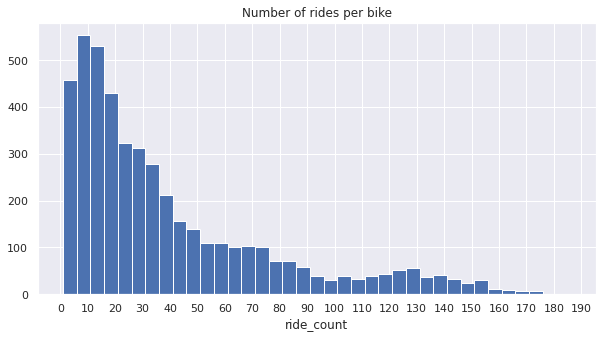

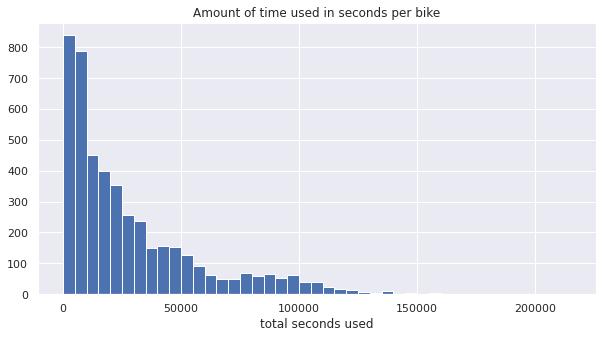

(100.0, 1303.9591748768473)

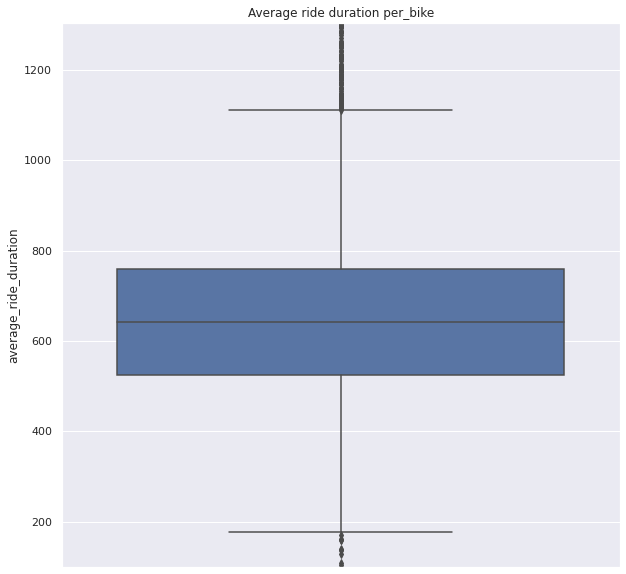

In [43]:
sb.set()
plt.figure(figsize=(10,5))
plt.title('Number of rides per bike')
bins = np.arange(1, bike_data.ride_count.max(), 5)
plt.hist(data = bike_data, 
    x = 'ride_count',
    bins=bins)
plt.xticks(np.arange(0, bike_data.ride_count.max(), 10))
plt.xlabel('ride_count')
plt.show();


bins = np.arange(1, bike_data.total_usage_time.max(), 5000)
plt.figure(figsize=(10,5))
plt.title('Amount of time used in seconds per bike')
plt.hist(data = bike_data, 
    x = 'total_usage_time',
    bins=bins)
#plt.xscale('log')
x_ticks = [int(x) for x in plt.xticks()[0]]
plt.xlabel('total seconds used')
plt.show();



plt.figure(figsize=(10,10))
plt.title('Average ride duration per_bike')
y_ticks = [100, 200, 400,600,800,1500,3000, 10000, 20000, 40000]
sb.boxplot(data = bike_data, y='average_ride_duration')
#plt.yscale('log')
#plt.yticks(y_ticks, labels=y_ticks)
plt.ylim(100,
    bike_data.average_ride_duration.quantile(0.95))



>**Notes**: Considering the short time frame of the data, these bikes are seeing a lot of use. On average, they've had 40 rides each at an average ride duration of 750 seconds (which seems short), to a total average of 30000 seconds usage each.
For bike data, a seperate dataframe was created indexed with the bike_id; this dataframe contains the total uses, total duration used, and average duration. T

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The start/end time distribution histograms show that the peaks times are roughly the same, which can be explained by most ride duration centering at around 6 minutes rather than representing something like we might expect from a round trip commute. People ride much more during the week further indicating use by commuters. The ride duration was best expressed with a log transformation.

A temporary dataframe called 'member_rides' was created, dropping records of members with a birth year prior to 1918, and creating a new column "member_age_rough". 
The riders mean age appears to be around 34, and the number of riders sharply drops off from there. 

Considering the short time frame of the data, these bikes are seeing a lot of use. On average, they've had 40 rides each at an average ride duration of 750 seconds (which seems short), to a total average of 30000 seconds usage each.
For bike data, a seperate dataframe was created indexed with the bike_id; this dataframe contains the total uses, total duration used, and average duration. After closer inspection, given the time frame, it will be difficult find any relationships with the bike data.




## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).


### Bivariate exploration: duration vs start time

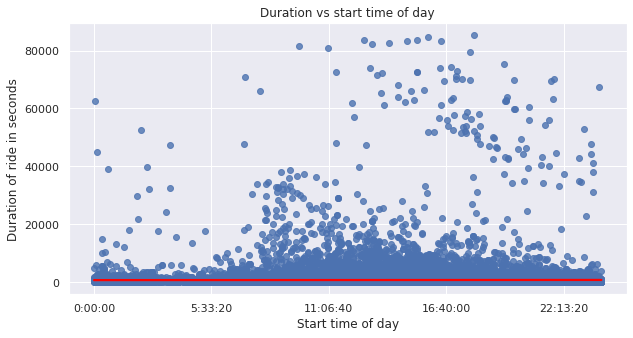

In [44]:

sb.set()
plt.figure(figsize=(10,5))
sb.regplot(data=bike_rides, x='start_tod_sec', y='duration_sec', line_kws={'color':'red'})
x_ticks = plt.xticks()[0][1:-1]
x_tick_labels = ([stamp_to_seconds(tick, reverse=True) for tick in plt.xticks()[0][1:-1]])
#plt.yscale('log')
plt.xticks(x_ticks, labels=x_tick_labels)
plt.title('Duration vs start time of day')
plt.xlabel('Start time of day')
plt.ylabel('Duration of ride in seconds');


> ***Note***: It looks like there isn't any relationship betweeen the total duration of the rides and the start time.

### Bivariate Exploration: Day of Week vs Average Duration

Text(0.5, 1.0, 'Average ride duration by day of week')

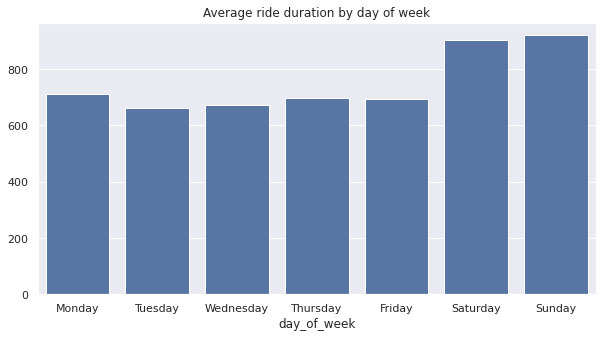

In [45]:
sb_blue = sb.color_palette()[0]

plt.figure(figsize=(10,5))
day_duration = bike_rides[['day_of_week', 'duration_sec']].groupby('day_of_week').mean()
sb.barplot(x=day_duration.index, y=day_duration.duration_sec.values, color=sb_blue)
plt.title('Average ride duration by day of week')

> ***Notes***: Longer rides happen on the weekends, on average.

### Bivariate Exploration: Rides by Gender

Text(0.5, 1.0, 'Number of rides by gender')

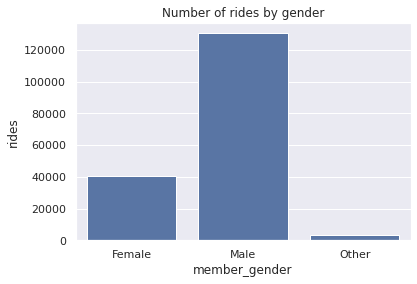

In [46]:
#rides by gender
gendered_rides = bike_rides.groupby('member_gender').count()
gendered_rides.reset_index(inplace=True)
gendered_rides = gendered_rides[['member_gender','start_time']]
gendered_rides.rename(columns={'start_time': 'rides'},inplace=True)
sb.barplot(x=gendered_rides.member_gender, y=gendered_rides.rides, color=sb_blue)
plt.title('Number of rides by gender')


### Bivariate Exploration: Gender vs Duration

Text(0.5, 1.0, 'Ride duration by gender')

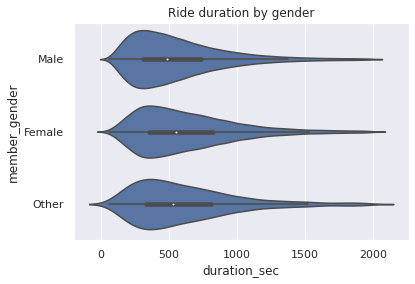

In [47]:
sb.violinplot(data = bike_rides[bike_rides['duration_sec'] < 2000], x='duration_sec', y='member_gender', color=sb_blue)
plt.title('Ride duration by gender')


>***Notes***: This is not very interesting at all.

### Bivariate Exploration: Gender vs start time of day

Text(0.5, 0, 'Start time of day in seconds')

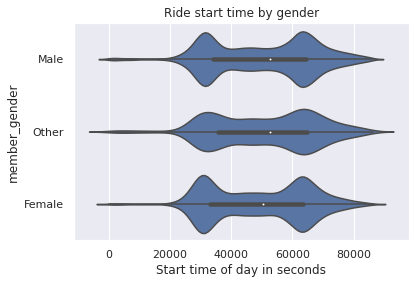

In [48]:
sb.violinplot(data = bike_rides, x='start_tod_sec', y='member_gender', color=sb_blue)
plt.title('Ride start time by gender')
plt.xlabel('Start time of day in seconds')

>***Notes***: The other gendered have a slightly more spread out distribution on the start time of day.

### Bivariate Exploration: Gender vs Age

(15.0, 70.0)

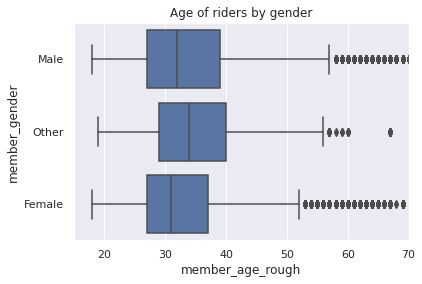

In [49]:
sb.boxplot(data = bike_rides, x='member_age_rough', y='member_gender', color=sb_blue)
plt.title('Age of riders by gender')
plt.xlim(15, 70)


>***Notes***: The other gendered riders tend to be slightly older.

### Bivariate Exploration: User type vs duration

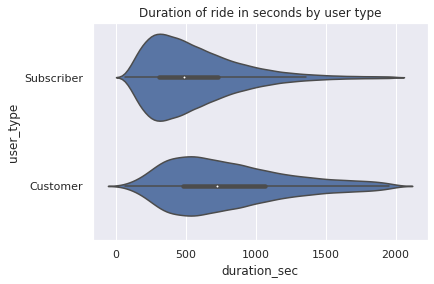

In [50]:
sb.violinplot(data = bike_rides[bike_rides['duration_sec'] < 2000], x='duration_sec', y='user_type', color=sb_blue)
plt.title('Duration of ride in seconds by user type');

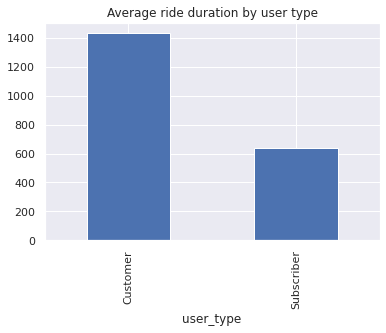

In [51]:
bike_rides.groupby('user_type')['duration_sec'].mean().plot(kind='bar')
plt.title('Average ride duration by user type');


>***Notes***: Non-subscriber type customers tend to go on significantly longer rides. 

### Bivariate Exploration: User type vs start time

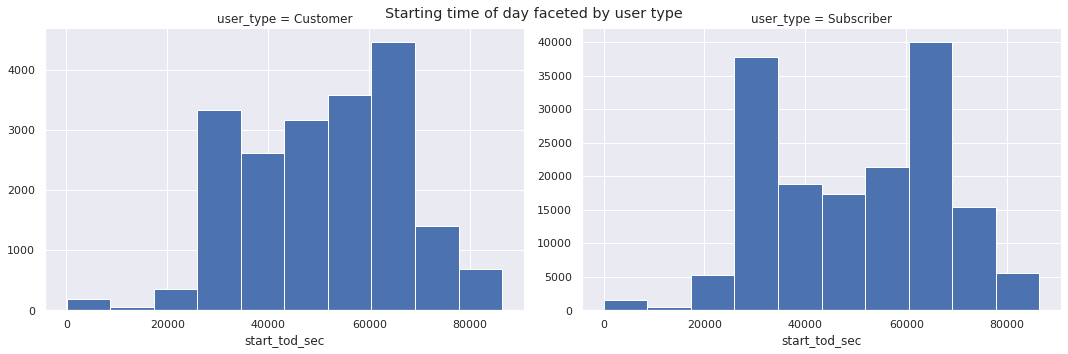

In [52]:

g = sb.FacetGrid(data = bike_rides, col = 'user_type', 
    sharey=False,
    height =5, aspect=1.5)
g.map(plt.hist, 'start_tod_sec')
g.fig.suptitle('Starting time of day faceted by user type');

***Notes:*** Non-subscriber customer tend share the same peak times with subscribers, but it tends to be a bit more spread out.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* We didn't find any relationship between the total duration of the rides and the start time.
* Longer rides happen on the weekends, on average.
* Other gendered riders tend to have just slightly longer rides, a slightly more evenly distribution of ride start time, and tend to be a little bit older than male/female.
* Non subscribers go for significantly longer rides on average, and have a more even distribution for their start time of day.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

No, relationships were difficult to find for me in this dataset.

## Multivariate Exploration

### Multivariate Exploration: Rides by age faceted by day of week and user type

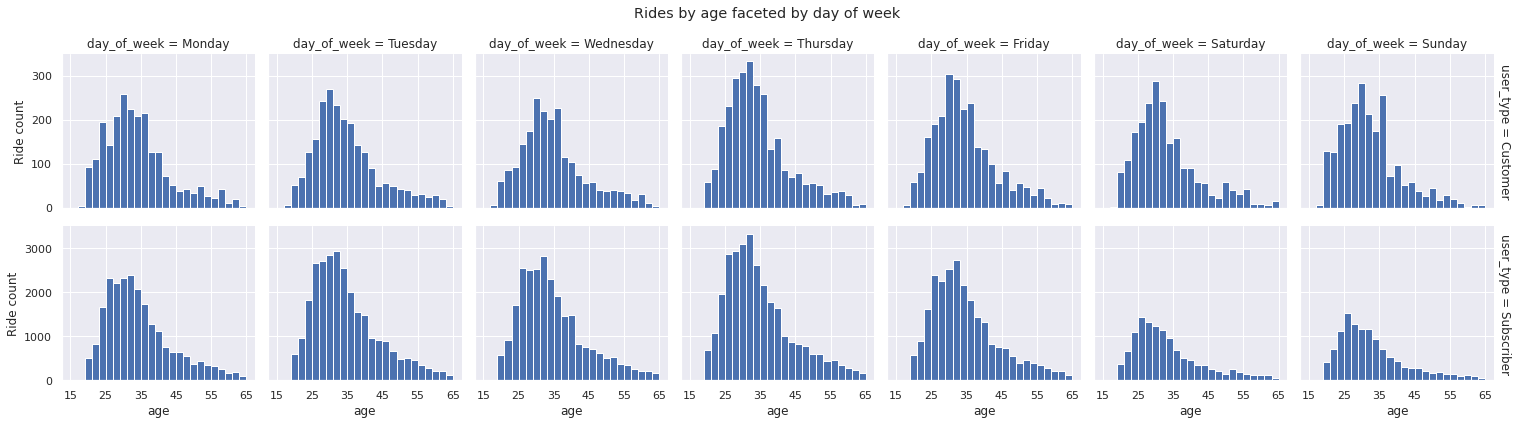

In [25]:
g = sb.FacetGrid(data=bike_rides, col='day_of_week', row='user_type', margin_titles=True, sharey='row')
g.fig.suptitle('Rides by age faceted by day of week')
g.map(plt.hist, 'member_age_rough', bins=np.arange(15,66,2))
axes = g.axes.flatten()
x_ticks = np.arange(15, 66, 10)
for ax in axes:
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_ticks)
    ax.set_xlabel('age')
g.set_ylabels('Ride count');

>***Notes***: the riders are concetrated in the 20-40 range on each day, but Saturday/Sunday there are fewer riders in general, reducing the skew slightly for subscribers; however, the trend for customers doesn't seem to change on weekends.

### Multivariate Exploration: Duration by day of week vs hour of day.

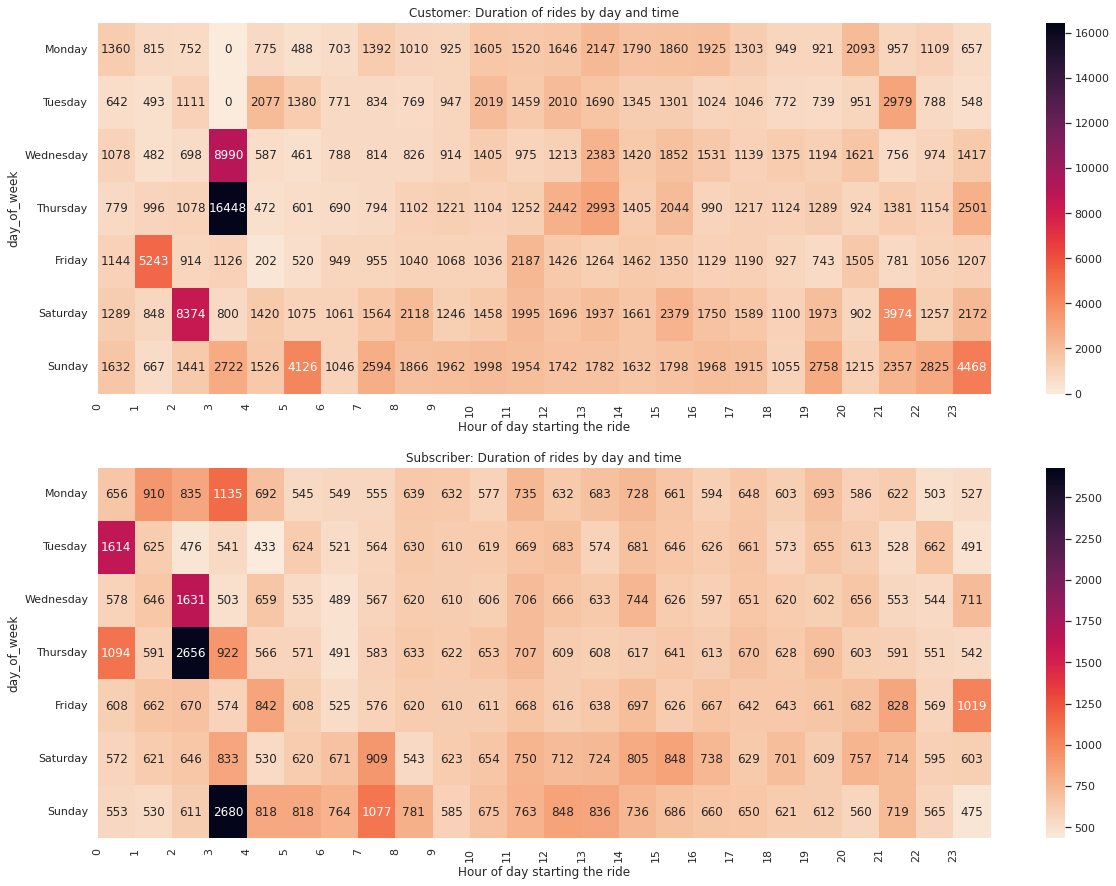

In [54]:

df_cust_dur_by_hour_day = bike_rides[bike_rides['user_type']=='Customer'].copy()[['start_hour', 'day_of_week', 'duration_sec']]
df_cust_dur_by_hour_day = df_cust_dur_by_hour_day.groupby(['start_hour', 'day_of_week']).mean().unstack('start_hour')
df_cust_dur_by_hour_day['duration_sec'] = df_cust_dur_by_hour_day.duration_sec.round()
df_cust_dur_by_hour_day.fillna(0, inplace=True)

df_sub_dur_by_hour_day = bike_rides[bike_rides['user_type']=='Subscriber'].copy()[['start_hour', 'day_of_week', 'duration_sec']]
df_sub_dur_by_hour_day = df_sub_dur_by_hour_day.groupby(['start_hour', 'day_of_week']).mean().unstack('start_hour')
df_sub_dur_by_hour_day['duration_sec'] = df_sub_dur_by_hour_day.duration_sec.round().astype('int')




plt.figure(figsize = (20, 15))
plt.subplot(211)
sb.heatmap(df_cust_dur_by_hour_day, cmap='rocket_r', annot = True, fmt='g')
x_ticks = (np.arange(0, 24, 1))
plt.xticks(x_ticks, labels=x_ticks)
plt.title('Customer: Duration of rides by day and time')
plt.xlabel('Hour of day starting the ride')


plt.subplot(212)
sb.heatmap(df_sub_dur_by_hour_day, cmap='rocket_r', annot = True, fmt='g')
x_ticks = (np.arange(0, 24, 1))
plt.xticks(x_ticks, labels=x_ticks)
plt.title('Subscriber: Duration of rides by day and time')
plt.xlabel('Hour of day starting the ride');


> ***Notes:*** this is interesting; as one might predict, rides tend to be a bit longer on Saturdays and Sundays. It is however a surprise to see that late at night and the wee hours of the morning we see longer rides too, which might indicate something about nightlife.

### Multivariate Exploration: Top riding times by day of week vs hour of day

In [26]:
df__cust_rides_by_hour_day = bike_rides[bike_rides['user_type']=='Customer'].copy()[['start_hour', 'day_of_week', 'start_time']]
df__cust_rides_by_hour_day = df__cust_rides_by_hour_day.groupby(['day_of_week', 'start_hour']).count().unstack()

df__subscriber_rides_by_hour_day = bike_rides[bike_rides['user_type']=='Subscriber'].copy()[['start_hour', 'day_of_week', 'start_time']]
df__subscriber_rides_by_hour_day = df__subscriber_rides_by_hour_day.groupby(['day_of_week', 'start_hour']).count().unstack()

x_ticks = (np.arange(0, 24, 1))

plt.figure(figsize=(20,15))

plt.subplot(211)
sb.heatmap(df__cust_rides_by_hour_day, cmap='rocket_r', annot = True, fmt='g')
plt.xticks(x_ticks, labels = x_ticks)
plt.title('Customer: Rides per hour vs day of week')

plt.subplot(212)
sb.heatmap(df__subscriber_rides_by_hour_day, cmap='rocket_r', annot = True, fmt='g');
plt.xticks(x_ticks, labels = x_ticks);
plt.title('Subscriber: Rides per hour vs day of week')


KeyError: "['start_hour'] not in index"

> ***Notes***: On weekdays, customers and subscribers don't seem to differ much in terms of the times they ride. On weekends though, the peak ride times almost reverse with more riders in the middle of the day. This trend is more apparent with customers (non-subscribers)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

* The riders age group is concetrated in the 20-40 range on each day, but Saturday/Sunday there are fewer riders in general, reducing the skew slightly.
* As one might predict, rides tend to be a bit longer on Saturdays and Sundays. It is however a surprise to see that late at night and the wee hours of the morning we see longer rides too, which might indicate something about nightlife.
* On weekdays, customers and subscribers don't seem to differ much in terms of the times they ride. On weekends though, the peak ride times almost reverse with more riders in the middle of the day. This trend is more apparent with customers (non-subscribers)

### Were there any interesting or surprising interactions between features?

It was surprising to see the average ride duration to peak between 2 and 4 am.

## Conclusions

* Peak usage time is between 07:00-10:00 and then again between 16:00-20:00 on weekdays. This may indicate a primary use case being commuting. Non-subscribers usage trend is less pronounced during this commute hours, and additionally see some peak usage between 10:00-18:00 on weekends.
* People tend to have longer rides on weekends, and non-subscribers tend to go on much longer rides.
* There is a surprising trend for longer rides between 00:00-05:00, which may indicate something about nightlife.
* Because members aren't identified in the dataset with a member_id, there was no way to reconcile individual rider patterns over multiple rides. 
* Considering the dataset only covers 28 days, the bikes see a lot of use. The time limitation probably prevents any further analysis regarding wear and tear, break downs.